In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

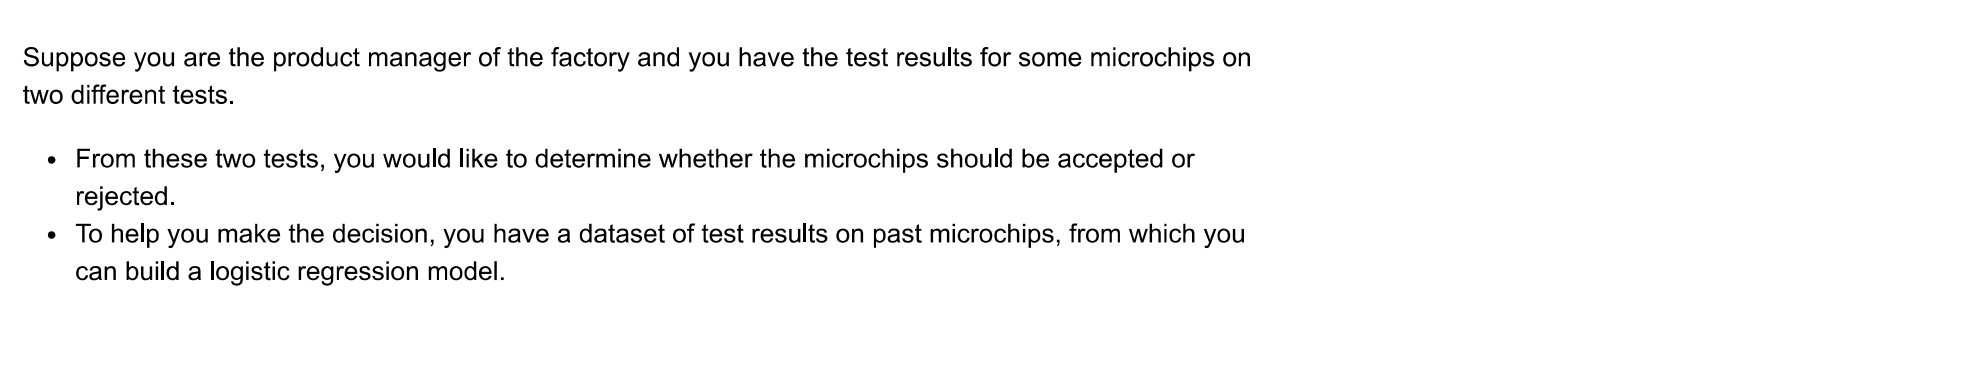

Tutorial: https://www.geeksforgeeks.org/machine-learning/logistic-regression-with-polynomial-features/

### Load and visualize data

In [12]:
column_names = ["Microchip Test 1", "Microchip Test 2", "Status"]
data = pd.read_csv("../data/3_09/ex2data2.csv", header=None, names=column_names)
data.head()

,Microchip Test 1,Microchip Test 2,Status
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


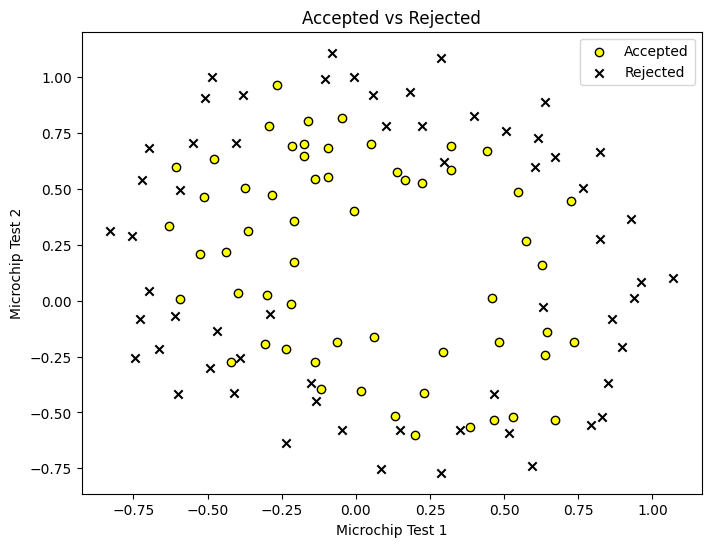

In [13]:
accepted = data[data["Status"] == 1]
rejected = data[data["Status"] == 0]

plt.figure(figsize=(8, 6))
plt.scatter(accepted["Microchip Test 1"], accepted["Microchip Test 2"], c='yellow', edgecolors='black', marker='o', label='Accepted')
plt.scatter(rejected["Microchip Test 1"], rejected["Microchip Test 2"], c='black', marker='x', label='Rejected')
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.title("Accepted vs Rejected")
plt.legend()
plt.show()

### Split data

In [14]:
# split the data into features and target var
X = np.array(data.loc[:, ["Microchip Test 1", "Microchip Test 2"]])   # features
y = np.array(data.loc[:,"Status"])   # target

# split the data into trainin and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape: ", X_train.shape, y_train.shape)
print("Testing set shape: ", X_test.shape, y_test.shape)

Training set shape:  (94, 2) (94,)
Testing set shape:  (24, 2) (24,)


### Generate polynomial features to fit a polynomial logistic regretion to the data

* As a 4-degree polynomial function is used, the model has 15 featrues: $f_{w,b}(x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1^2 + w_4 x_1 x_2 + w_5 x_2^2 + w_6 x_1^3 + w_7 x_1^2 x_2 + w_8 x_1 x_2^2 + w_9 x_2^3 + w_{10} x_1^4 + w_{11} x_1^3 x_2 + w_{12} x_1^2 x_2^2 + w_{13} x_1 x_2^3 + w_{14} x_2^4$

In [16]:
poly = PolynomialFeatures(degree=4)  
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print("Training set shape: ", X_train_poly.shape, y_train.shape)
print("Testing set shape: ", X_test_poly.shape, y_test.shape)

Training set shape:  (94, 15) (94,)
Testing set shape:  (24, 15) (24,)


### Logistic regression with regularization form scratch

In [19]:
def sigmoid(z):
    '''
    Compute the sigmoid of z
    '''
    g = 1 / (1 + np.exp(-z))
    return g


def compute_reg_cost(X, y, w, b, _lambda=1):
    '''
    Compute the cost over all samples
    '''
    m, n = X.shape
    loss = 0

    for i in range(m):
        fwb = sigmoid(np.dot(w, X[i]) + b)
        loss += (-y[i]) * np.log(fwb) - (1 - y[i]) * np.log(1 - fwb) 

    total_cost = loss / m

    # Add regularization
    reg_cost = sum(w[j]**2 for  j in range(n))
    reg_cost = reg_cost * _lambda / (2*m)
                   
    reg_total_cost = total_cost + reg_cost    
    return reg_total_cost
    
    
def compute_reg_gradient(X, y, w, b, _lambda=1):
    '''
    Compute the gradient of logistic regression\
    '''
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i], w) + b)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] += err_i * X[i, j]
        dj_db += err_i

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    # Add regularization    
    for j in range(n):
        dj_dw[j] += (_lambda / m) * w[j]
    
    return dj_dw, dj_db


def gradient_descent(X, y, w, b, cost_func, gradient_func, alpha, iters, _lambda=1):   
    '''
    Perforrms gradient descent to learn model parameters
    '''
    m = len(X)
    J_history = []
    w_history = []

    for i in range (iters):
        # Calculate gradient 
        dj_dw, dj_db = gradient_func(X, y, w, b)

        # Update parameters
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost at each iteration
        cost = cost_func(X, y, w, b)
        J_history.append(cost)
            
        # Print cost at every iters/10th iteration:
        if i % math.ceil(iters / 10) == 0 or i == (iters - 1):
            w_history.append(w)
            print(f"Iteration {i:4}: cost = {float(J_history[-1]):8.2f} ")
            
    return w, b, J_history, w_history
    

### Training the model

In [24]:
np.random.seed(1) 
w_init = 0.05 * np.random.rand(X_train_poly.shape[1])
b_init = -1
print(f"w_init = {w_init}, b_init = {b_init}")

_lambda = 0.01
iters = 100000
alpha = 0.001
w_final, b_final, J_history, w_history = gradient_descent(X_train_poly, y_train, w_init, b_init, compute_reg_cost, compute_reg_gradient, alpha, iters, _lambda)
print(f"w_final = {w_final}, b_final = {b_final}")

w_init = [2.08511002e-02 3.60162247e-02 5.71874087e-06 1.51166286e-02
 7.33779454e-03 4.61692974e-03 9.31301057e-03 1.72780364e-02
 1.98383737e-02 2.69408367e-02 2.09597257e-02 3.42609750e-02
 1.02226125e-02 4.39058718e-02 1.36937966e-03], b_init = -1
Iteration    0: cost =     0.80 
Iteration 10000: cost =     0.66 
Iteration 20000: cost =     0.63 
Iteration 30000: cost =     0.61 
Iteration 40000: cost =     0.60 
Iteration 50000: cost =     0.59 
Iteration 60000: cost =     0.59 
Iteration 70000: cost =     0.58 
Iteration 80000: cost =     0.58 
Iteration 90000: cost =     0.58 
Iteration 99999: cost =     0.58 
w_final = [ 0.59616248  0.15887417  0.92993996 -1.54269123 -0.48786905 -1.1026022
 -0.01837701 -0.28328111 -0.29227955 -0.191988   -1.19756401 -0.03794021
 -0.45419248 -0.16585278 -1.02182542], b_final = 0.20414655071081733


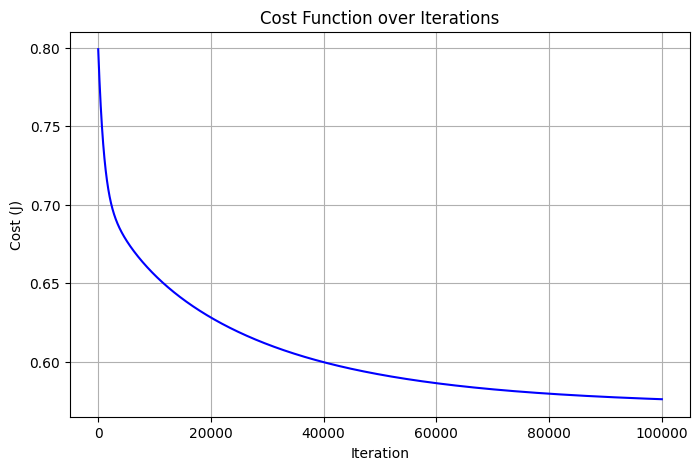

In [25]:
# Plot cost values from gradient descent run
plt.figure(figsize=(8, 5))
plt.plot(range(len(J_history)), J_history, color='blue')
plt.xlabel("Iteration")
plt.ylabel("Cost (J)")
plt.title("Cost Function over Iterations")
plt.grid(True)
plt.show()

### Polynomial logistic regression with scikit-learn

* Combine steps of generating polynomial features and training logistic regression model in a pipeline to streamline the workflow into a single process.

In [38]:
# Polynomial feature expansion  
model = make_pipeline(PolynomialFeatures(4), LogisticRegression(C=1.0))

# Fit on original data. The pipeline automatically applies the transformation to polynomial features
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('logisticregression', LogisticRegression())])

### Plot the decision boundary 

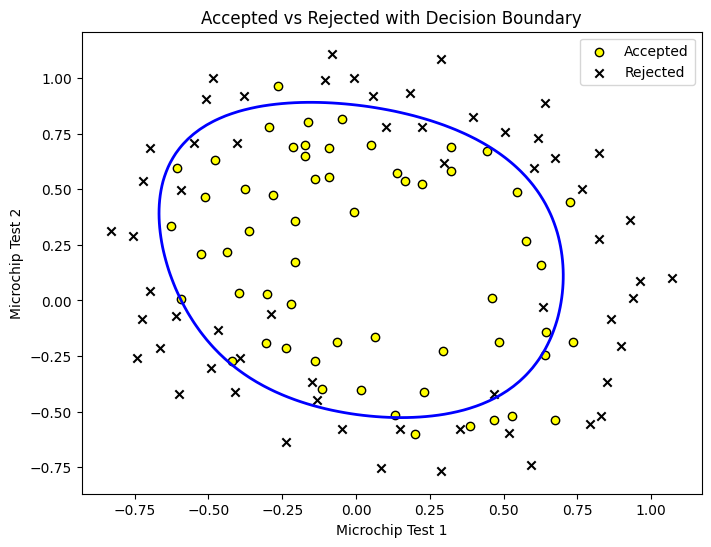

In [39]:
# Create a grid over the input space
u = np.linspace(data["Microchip Test 1"].min()-0.1, data["Microchip Test 1"].max()+0.1, 100)
v = np.linspace(data["Microchip Test 2"].min()-0.1, data["Microchip Test 2"].max()+0.1, 100)
xx, yy = np.meshgrid(u, v)

# Flatten the grid and combine into coordinate pairs
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict using the trained model (with polynomial transformation inside)
probs = model.predict_proba(grid)[:, 1]

# Reshape predictions back to grid shape
probs = probs.reshape(xx.shape)

# Plot original data
accepted = data[data["Status"] == 1]
rejected = data[data["Status"] == 0]

plt.figure(figsize=(8, 6))
plt.scatter(accepted["Microchip Test 1"], accepted["Microchip Test 2"], c='yellow', edgecolors='black', marker='o', label='Accepted')
plt.scatter(rejected["Microchip Test 1"], rejected["Microchip Test 2"], c='black', marker='x', label='Rejected')

# Plot decision boundary: probability = 0.5
plt.contour(xx, yy, probs, levels=[0.5], linewidths=2, colors='blue')

plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.title("Accepted vs Rejected with Decision Boundary")
plt.legend()
# plt.grid(True)
plt.show()